In [1]:
import pandas as pd
import Procedatos as P
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import choice
from scipy.stats import kurtosis, skew
import warnings
warnings.filterwarnings('ignore')
from Graficos import *

## Figura 1

Variación de las medidas dependiendo del parámetro $k$. Se presenta el valor de las medidas de desempeño para un modelo con memoria 12 ($d\,{=}\,12$) en donde hemos variado el número de predictores $k$ en el conjunto de valores $\{1,3,6,9,12\}$.En el primer panel de izquierda a derecha se presenta el Attendance, en el segundo el Efficiency, en el tercero el Inaccuracy y en el cuarto el Deviation. Las barras de error representan un intervalo de confianza del 95\%.

In [74]:
def figura1(degrees=0, to_file=False):
    p1 = 'Num_predic'
    comp1 = '# of predictors (k)'
    variables = ['Attendance', 'Efficiency', 'Inaccuracy', 'Deviation']
    sweep1 = P.leer_datos([12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True)
    sweep1['Modelo'] = sweep1[p1]
    data = P.merge_modelos(sweep1)
    fig, ax = plt.subplots(1,4, figsize=(12,3), tight_layout=True, dpi=300)
    for i, v in enumerate(variables):
        sns.lineplot(x='Modelo',y=v,data=data,ax=ax[i],err_style="bars",ci=95)
        ax[i].set_ylabel(v)
        ax[i].set_xlabel(comp1)
        ax[i].tick_params(labelrotation=degrees)
        ax[i].set_xticks([1,3,6,9,12])
        ax[i].set_title(v + ' (d=12)')
        ax[i].grid()
    if to_file:
        plt.savefig('Figura1.png', dpi=300)
        print("Imagen guardada!")


Imagen guardada!


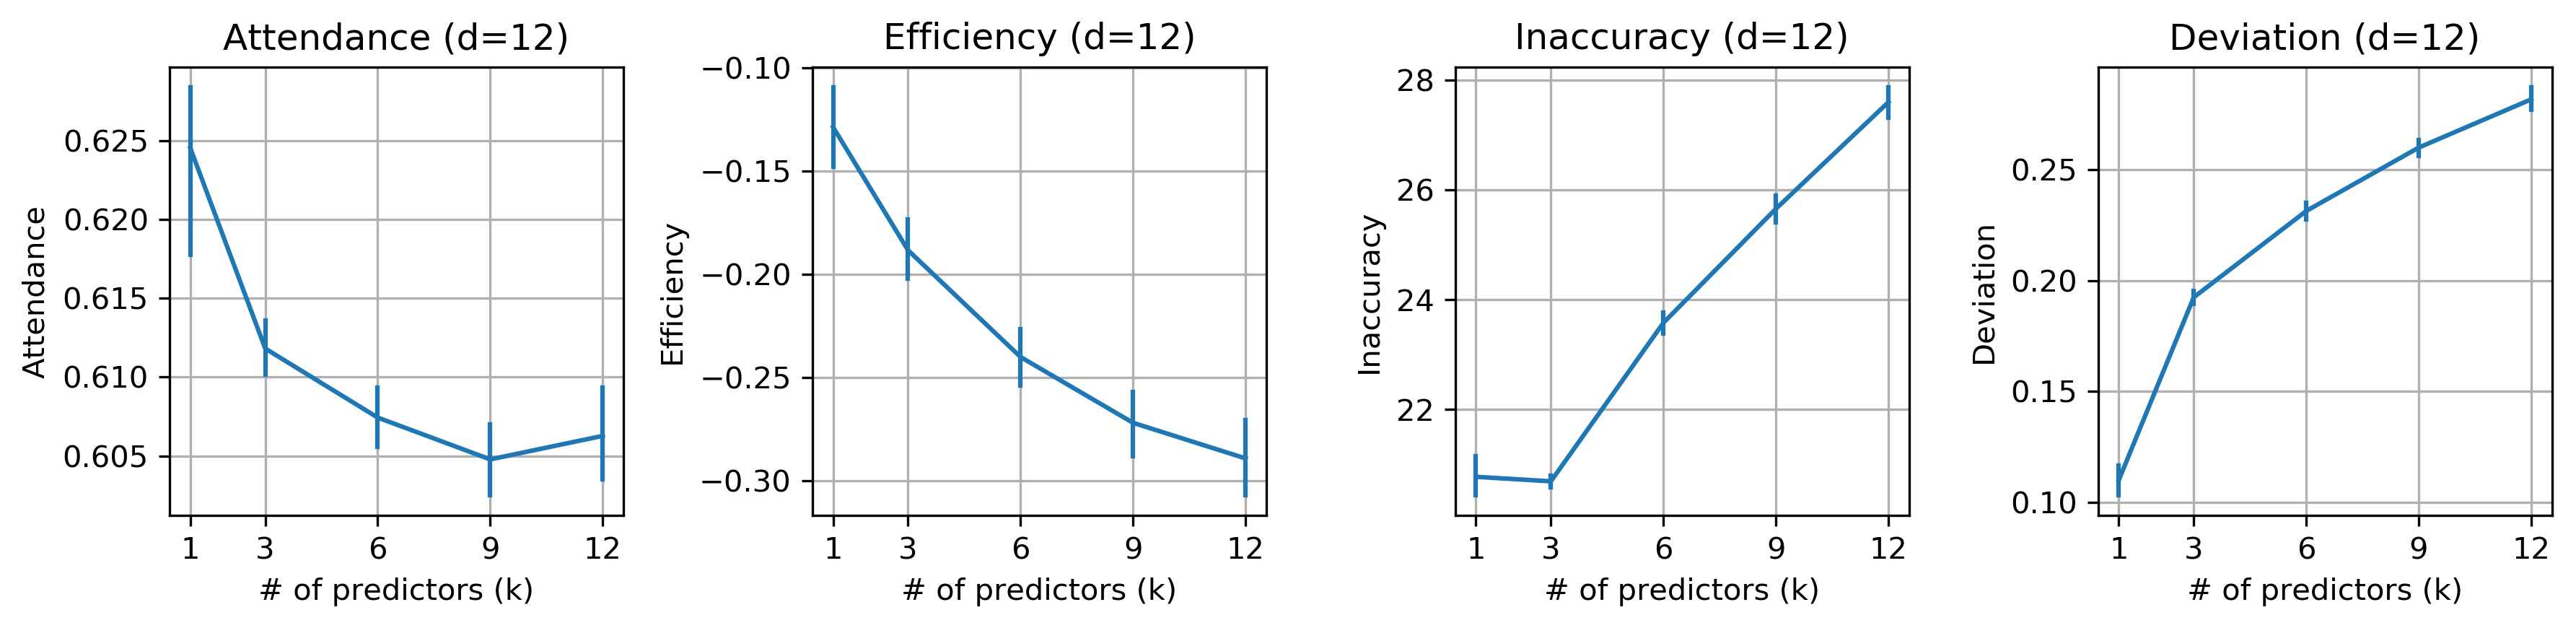

In [92]:
figura1(to_file=True)

---

# Figura 2

Ejemplo de la dinámica por ronda observado en un trial arbitrario, para un modelo con $k\,{=}\,1$. Cada fila representa una ronda $t$ (con $t=84,\ldots, 89$) en un trial típico tomado de las 100 simulaciones. El panel de la izquierda presenta la distribución de las predicciones $s(t)$ de los predictores activos de los agentes. En el panel del medio se observa la cantidad de agentes que toma o bien la decisión de ir o bien de no ir al bar. El panel de la derecha muestra la distribución de las distancias entre las predicciones y la asistencia de la ronda, es decir $|s(t)-A_t|$ para cada predictor activo $s$.

In [87]:
def graficar(data, trial=0, r_ini=84, n_rounds=5, k=0, to_file=False, nombre=2):
    ids = list(data['Identificador'].unique())
    # ident = choice(ids)
    ident = ids[trial]
    inicial = True
    fig, ax = plt.subplots(n_rounds,3, figsize=(8,2*n_rounds), tight_layout=True, dpi=300)
    fig.suptitle(f'Rounds {r_ini} through {r_ini + n_rounds} (k={k})', fontsize=14)
    for r in range(n_rounds):
        if inicial:
            ax[r,0].set_title(f'Distribution of\nPredictions from\nactive predictors')
            ax[r,1].set_title(f'Decisions')
            ax[r,2].set_title('Distribution of\ndistances between\nPrediction and Attendance')
            inicial = False
        else:
            ax[r,0].set_title('')
            ax[r,1].set_title('')
            ax[r,2].set_title('')
        df = pd.DataFrame(data[data['Ronda'] == r_ini+r])
        df['Asistencia'] = df.groupby('Identificador')['Estado'].transform('sum')
        df['Estado1'] = df['Estado'].apply(lambda x: 'Go' if x == 1 else 'No go')
        df = pd.DataFrame(df[df['Identificador'] == ident])
        df['|P-A|'] = np.abs(df['Prediccion_lag'] - df['Asistencia'])
        sns.histplot(x='Prediccion_lag', data=df, kde=True, ax=ax[r,0], bins=50)
        sns.countplot(x='Estado1', order=['Go', 'No go'], data=df, ax=ax[r,1])
        sns.histplot(x='|P-A|', data=df, kde=True, ax=ax[r,2])
        ax[r,0].set_xlim([0,100])
        ax[r,0].set_xlabel('')
        ax[r,0].axvline(60, ls='--', color='red')
        ax[r,1].set_ylim([0,100])
        ax[r,1].set_xlabel('')
        ax[r,1].axhline(60, ls='--', color='red')
        ax[r,1].set_ylabel('')
#        ax[r,1].tick_params(labelleft=False)
        ax[r,2].set_xlim([0,100])
        ax[r,2].set_xlabel('')
        ax[r,2].set_ylabel('')
#        ax[r,2].tick_params(labelleft=False)
    if to_file:
        plt.savefig(f'Figura{nombre}.png', dpi=300)
        print("Imagen guardada!")
    
def figuras2y3(k, to_file=False, nombre=2):
    df = P.leer_datos([12],[k],[100],[100], 
                       verb=False,muchos=False,cola=False)
    df['Prediccion_lag'] = df.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df['Attendance'] = df.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    trial=10
    r_ini=84
    n_rounds=5
    graficar(data=df, 
             trial=trial, 
             r_ini=r_ini, 
             n_rounds=n_rounds, 
             k=k,
             to_file=to_file,
             nombre=nombre
            )


Imagen guardada!


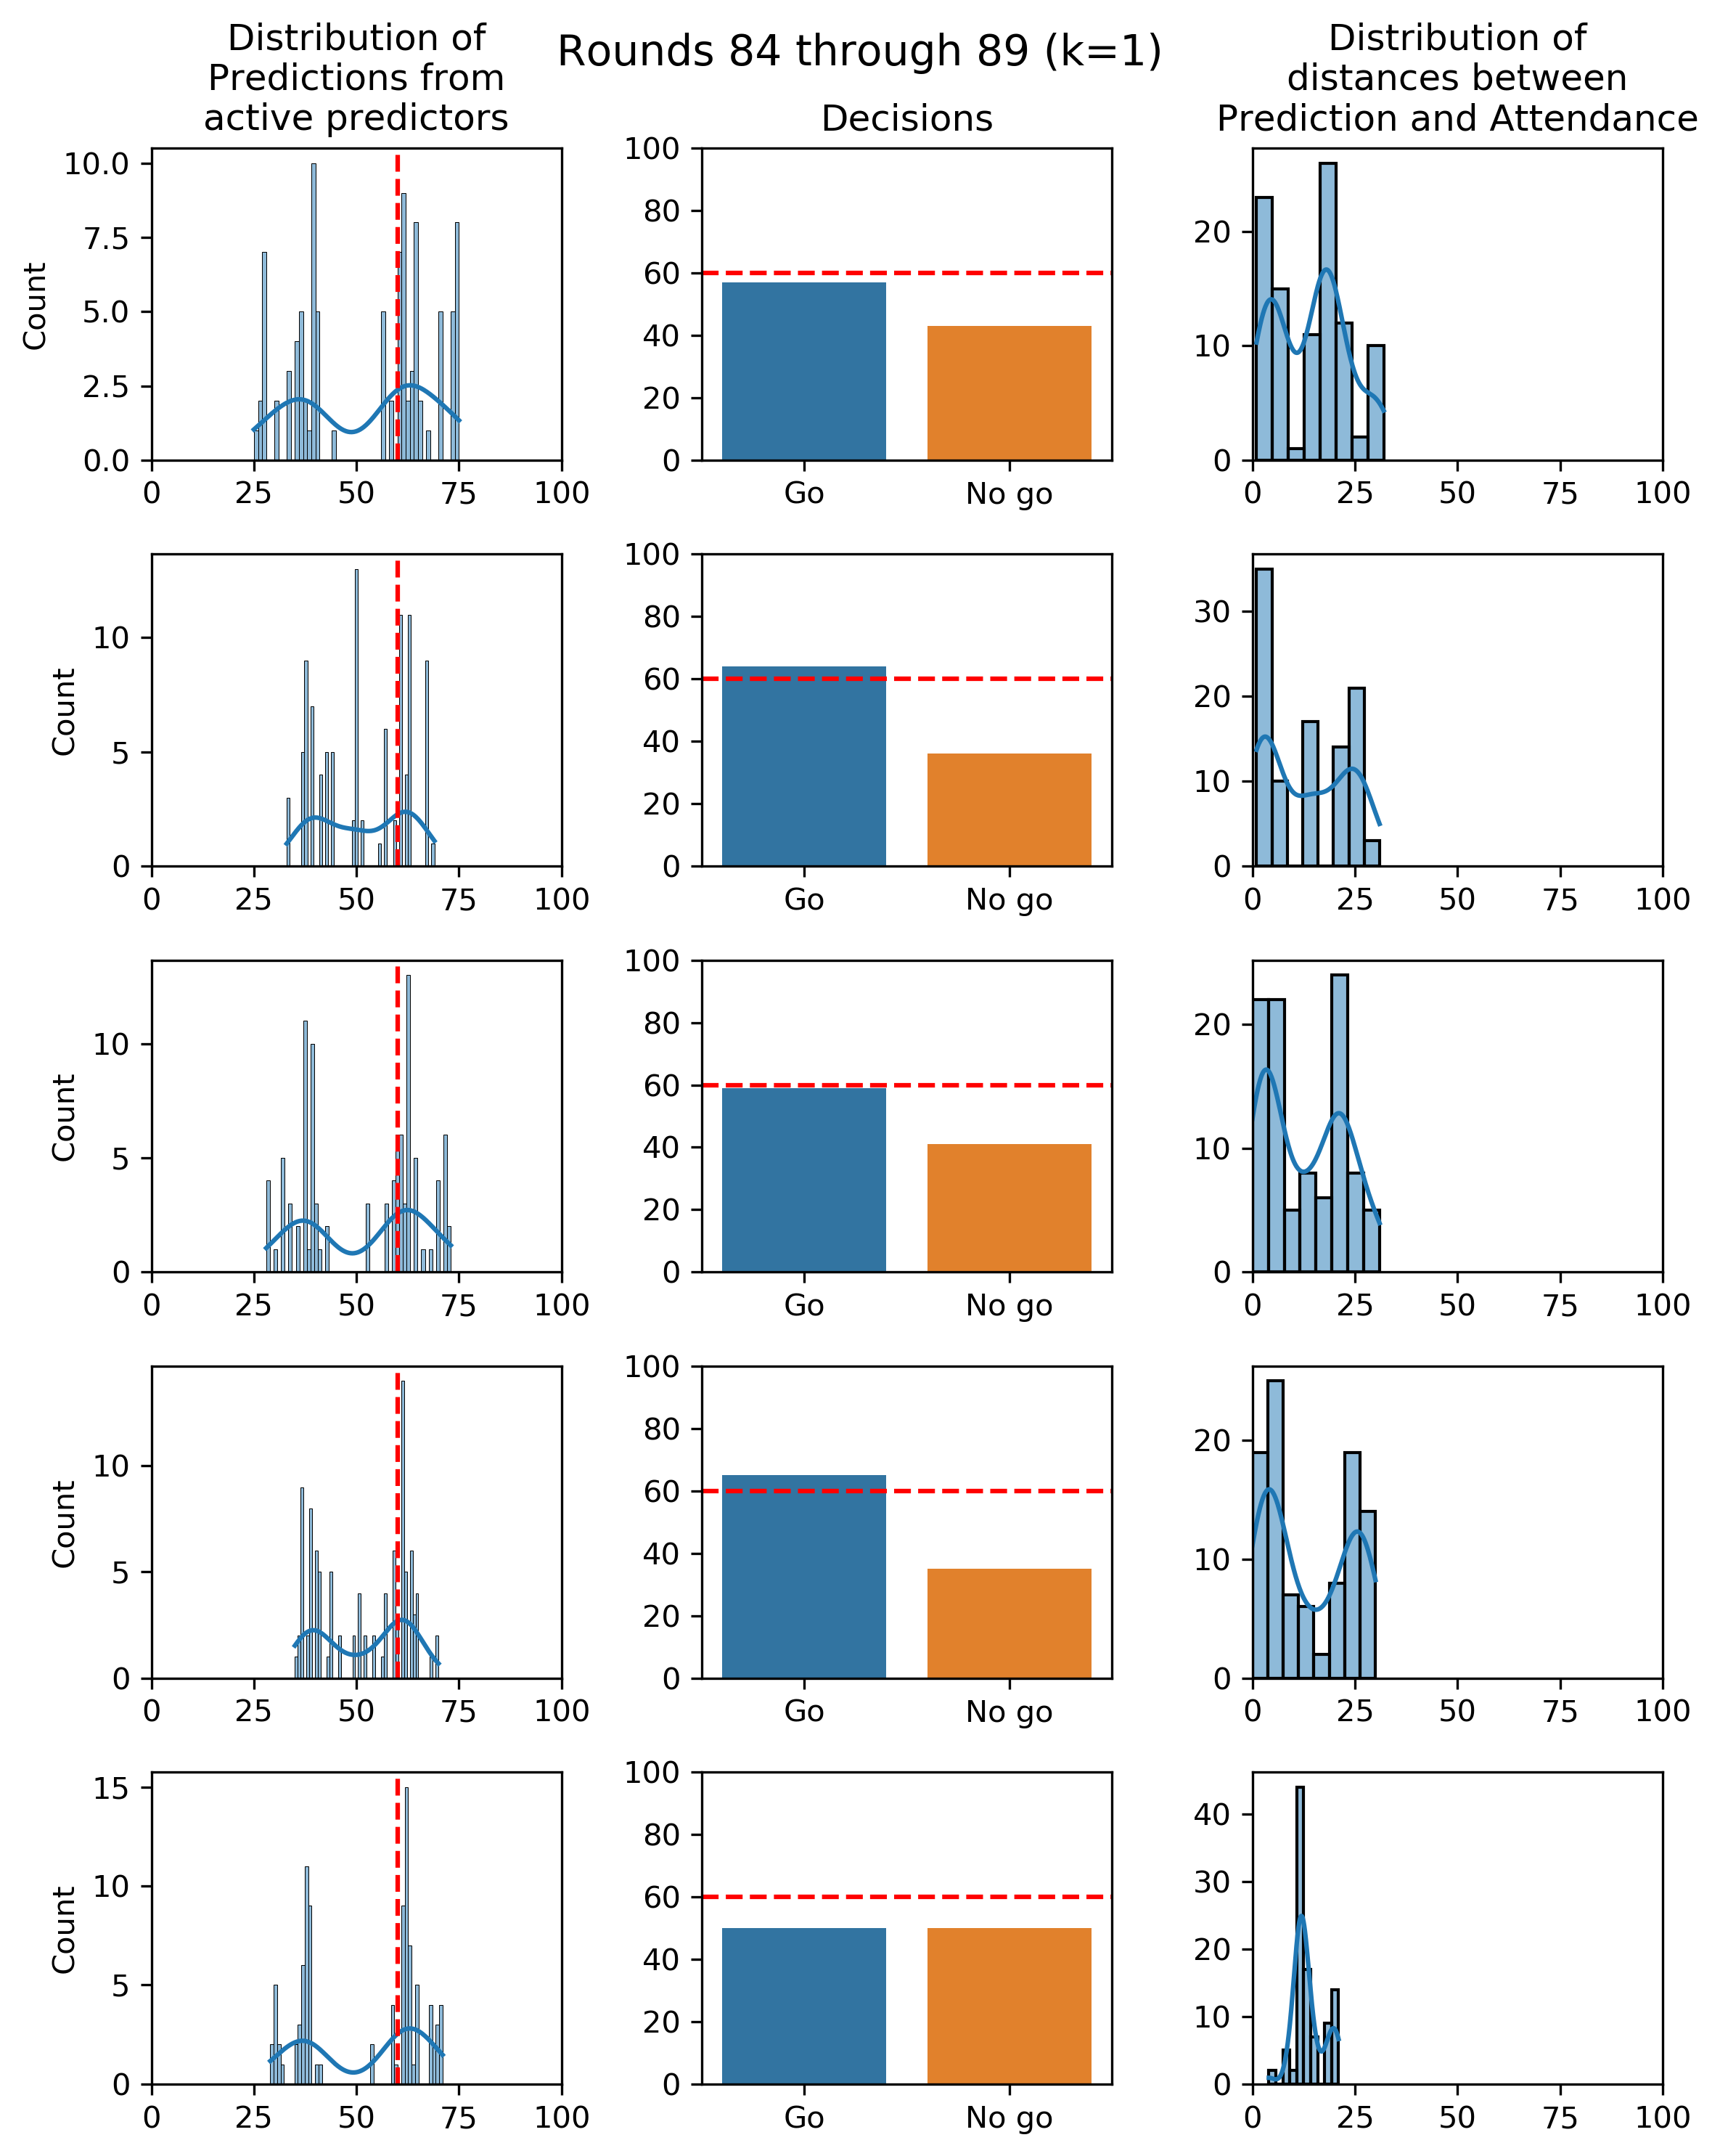

In [88]:
figuras2y3(k=1, to_file=True, nombre=2)

---

# Figura 3

Ejemplo de la dinámica por ronda observado en un trial arbitrario, para un modelo con $k\,{=}\,12$. Cada fila representa una ronda $t$ (con $t=84,\ldots, 89$) en un trial típico tomado de las 100 simulaciones. El panel de la izquierda presenta la distribución de las predicciones $s(t)$ de los predictores activos de los agentes. En el panel del medio se observa la cantidad de agentes que toma o bien la decisión de ir o bien de no ir al bar. El panel de la derecha muestra la distribución de las distancias entre las predicciones y la asistencia de la ronda, es decir $|s(t)-A_t|$ para cada predictor activo $s$.

Imagen guardada!


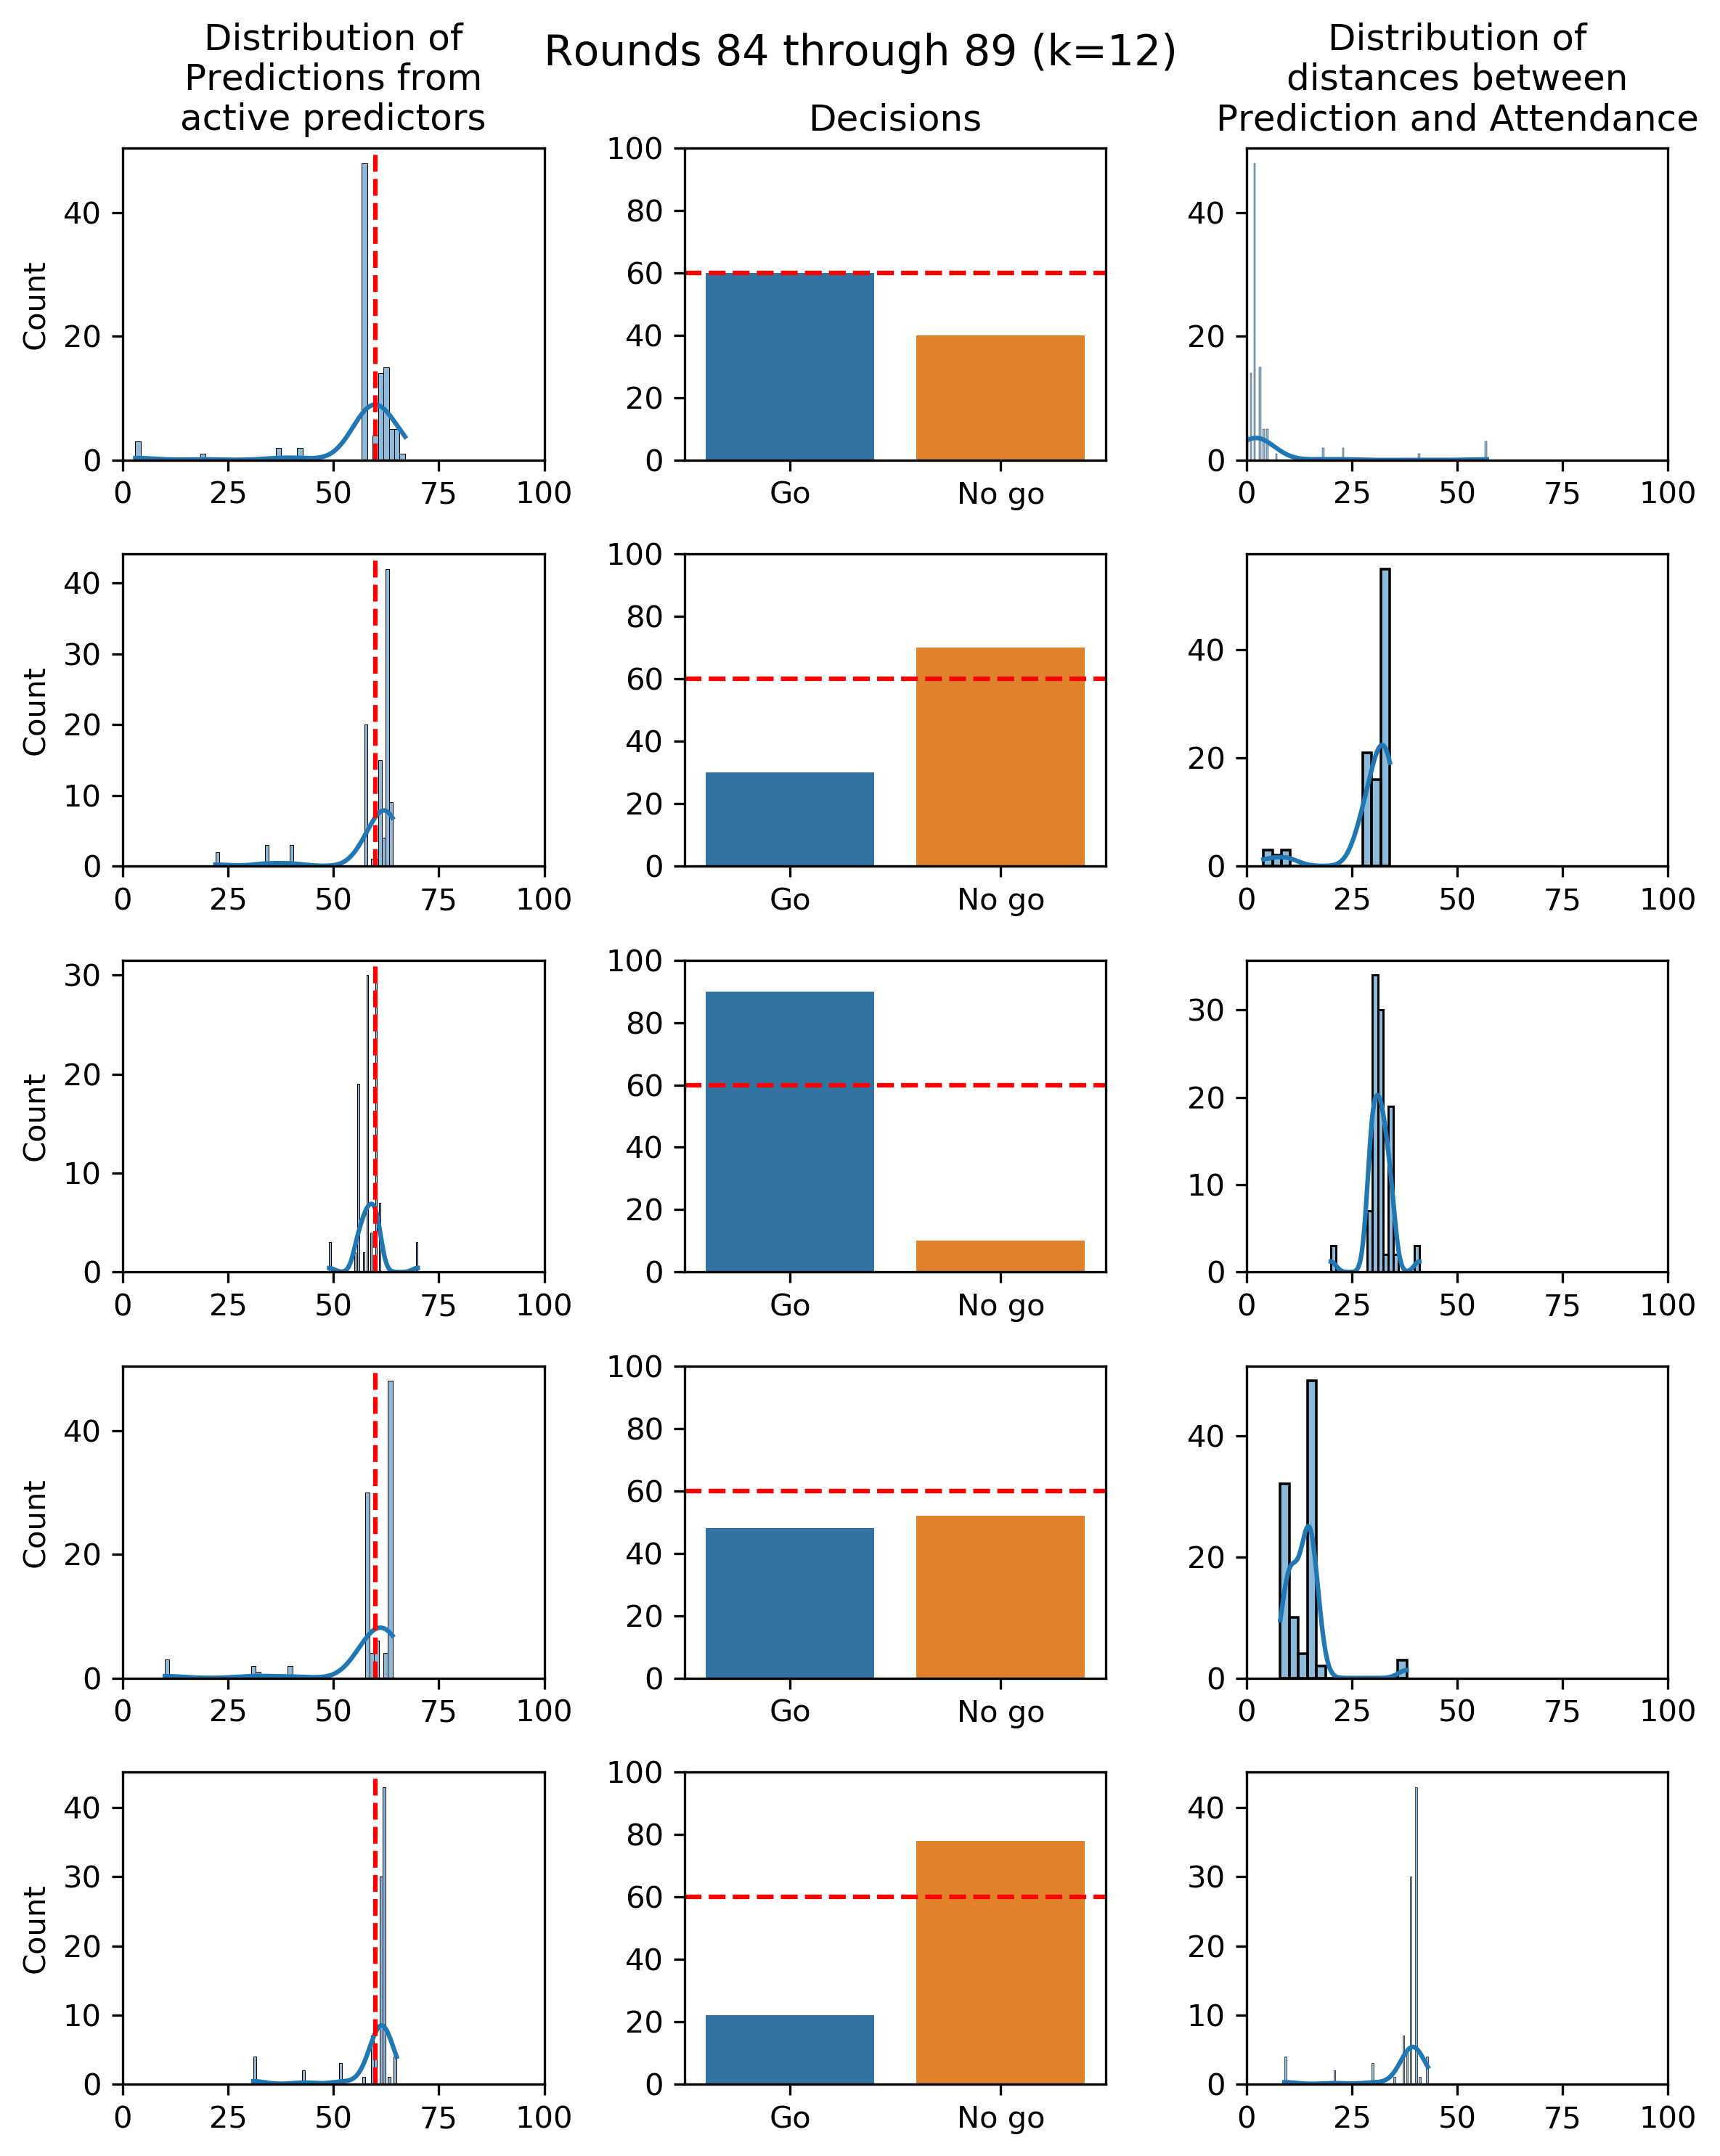

In [89]:
figuras2y3(k=12, to_file=True, nombre=3)

---

# Figura 4

$\Delta m$ vs.~ronda para los modelos $k\,{=}\,1,12$.

In [81]:
def figura4(trial=0, to_file=False):
    df1 = P.leer_datos([12],[1],[100],[100], verb=False,muchos=False,cola=False)
    df1['Prediccion_lag'] = df1.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df1['Attendance'] = df1.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df1.head()
    df12 = P.leer_datos([12],[12],[100],[100], verb=False,muchos=False,cola=False)
    df12['Prediccion_lag'] = df12.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df12['Attendance'] = df12.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df12.head()
    # Filtering dataframes for trial
    ids = list(df1['Identificador'].unique())
    ident = ids[trial]
    dfA = pd.DataFrame(df1[df1['Identificador'] == ident])
    ids = list(df12['Identificador'].unique())
    ident = ids[trial]
    dfB = pd.DataFrame(df12[df12['Identificador'] == ident])
    # Obtaining variables to draw
    df1A = dfA.groupby('Ronda')['Prediccion_lag'].value_counts().reset_index(name='Conteo')
    df2A = df1A.groupby('Ronda').apply(lambda x: diferencia(list(x['Prediccion_lag']), list(x['Conteo']))).reset_index()
    df2A.columns = ['Ronda','Dif_modes']
    df1B = dfB.groupby('Ronda')['Prediccion_lag'].value_counts().reset_index(name='Conteo')
    df2B = df1B.groupby('Ronda').apply(lambda x: diferencia(list(x['Prediccion_lag']), list(x['Conteo']))).reset_index()
    df2B.columns = ['Ronda','Dif_modes']
    # Plotting
    fig, ax = plt.subplots(1,2, figsize=(4,2), tight_layout=True, dpi=300)
    sns.lineplot(x='Ronda',y='Dif_modes',data=df2A,ax=ax[0])
    sns.lineplot(x='Ronda',y='Dif_modes',data=df2B,ax=ax[1])
    max1 = ax[0].get_ylim()[1]
    max2 = ax[1].get_ylim()[1]
    maximo = max(max1, max2)
    ax[0].set_ylim([0,maximo])
#    ax[0].set_ylabel('Absolute difference\nin prediction modes\nfrom active predictors')
    ax[0].set_title('$k=1$')
    ax[0].set_ylabel('$\Delta m$')
    ax[0].set_xlabel('Round')
    ax[0].grid()
    ax[1].set_title('$k=12$')
    ax[1].set_ylim([0,maximo])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('Round')
    ax[1].tick_params(labelleft=False, left=False)
    ax[1].grid()
#    fig.suptitle('Difference between 1st and 2nd\nmost frequent predictions', fontsize=10)
    if to_file:
        plt.savefig('Figura4.png', dpi=300)
        print("Imagen guardada!")

Imagen guardada!


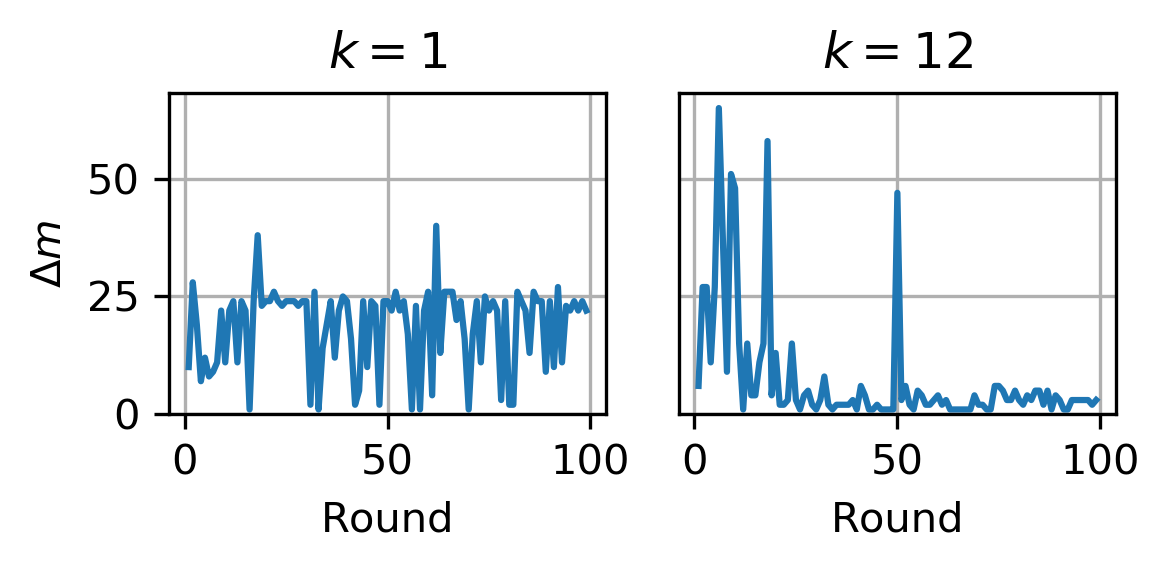

In [90]:
figura4(trial=10, to_file=True)

---

# Figura 5

Promedio de las predicciones vs.~ronda para los modelos $k\,{=}\,1,12$.

In [83]:
def figura5(trial=0, to_file=False):
    df1 = P.leer_datos([12],[1],[100],[100], verb=False,muchos=False,cola=False)
    df1['Prediccion_lag'] = df1.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df1['Attendance'] = df1.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df1.head()
    df12 = P.leer_datos([12],[12],[100],[100], verb=False,muchos=False,cola=False)
    df12['Prediccion_lag'] = df12.groupby(['Identificador','Agente'])['Prediccion'].transform('shift',1)
    df12['Attendance'] = df12.groupby(['Identificador','Ronda'])['Estado'].transform('sum')
    # df12.head()    
    # Filtering dataframes for trial
    ids = list(df1['Identificador'].unique())
    ident = ids[trial]
    dfA = pd.DataFrame(df1[df1['Identificador'] == ident])
    ids = list(df12['Identificador'].unique())
    ident = ids[trial]
    dfB = pd.DataFrame(df12[df12['Identificador'] == ident])
    # Obtaining variables to draw
    dfAp = dfA.groupby('Ronda')['Prediccion_lag'].apply(lambda x: np.mean(x)).reset_index(name='Av.Prediction')
    dfBp = dfB.groupby('Ronda')['Prediccion_lag'].apply(lambda x: np.mean(x)).reset_index(name='Av.Prediction')
    # Plotting
    fig, ax = plt.subplots(1,2, figsize=(4,2), tight_layout=True, dpi=300)
    sns.lineplot(x='Ronda', y='Av.Prediction', data=dfAp, ax=ax[0])
    sns.lineplot(x='Ronda', y='Av.Prediction', data=dfBp, ax=ax[1])
    max1 = ax[0].get_ylim()[1]
    max2 = ax[1].get_ylim()[1]
    maximo = max(max1, max2)
    ax[0].set_ylim([0,maximo])
#    ax[0].set_ylabel('Absolute difference\nin prediction modes\nfrom active predictors')
    ax[0].set_title('$k=1$')
    ax[0].set_ylabel('Average prediction')
    ax[0].set_xlabel('Round')
    ax[0].grid()
    ax[0].axhline(60, ls='--', color='red', linewidth=.5)
    ax[1].set_title('$k=12$')
    ax[1].set_ylim([0,maximo])
    ax[1].set_ylabel('')
    ax[1].set_xlabel('Round')
    ax[1].tick_params(labelleft=False, left=False)
    ax[1].grid()
    ax[1].axhline(60, ls='--', color='red', linewidth=.5)
#    fig.suptitle('Difference between 1st and 2nd\nmost frequent predictions', fontsize=10)
    if to_file:
        plt.savefig('Figura5.png', dpi=300)
        print("Imagen guardada!")

Imagen guardada!


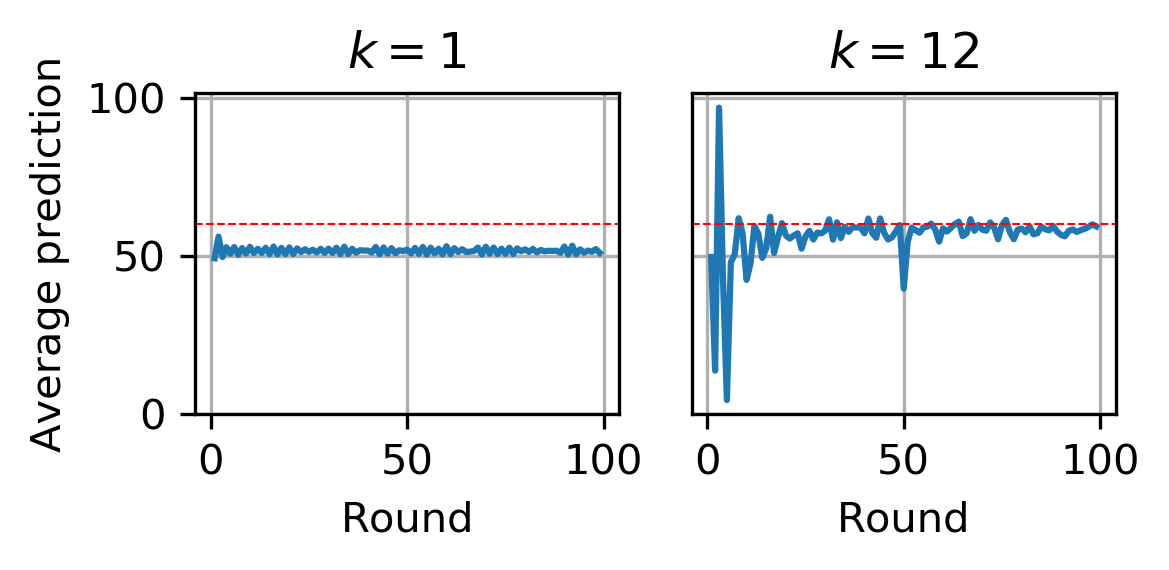

In [91]:
figura5(trial=10, to_file=True)

---

# Figura 6

Frecuencia de predictor activo compartido y reducción en el número de predictores activos. En el panel de la izquierda observamos los histogramas de predictor activo compartido, en el cual el eje $x$ representa una cantidad $n$ de agentes y el eje $y$ representa, para cada $n$, la frecuencia de rondas en las cuales $n$ agentes usaron el mismo predictor activo (se consideraron solo las últimas 20 rondas de los 100 trials). En el panel de la derecha el eje $x$ es el número de predictores en la bolsa de cada agente ($k$) y el eje $y$ es el total de predictores activos en la ronda. Cada datapoint es una ronda de las últimas 20 de los 100 trials ($N\,{=}\,2000$).

In [7]:
def figura6(to_file=False):
    data1 = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=True)
    dfA = data1.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
    #    dfA = dfA.groupby(['Identificador','Ronda'])['Conteo'].mean().reset_index()
    dfA['Model'] = 'k=1'
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=True)
    dfB = data2.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
    #    dfB = dfB.groupby(['Identificador','Ronda'])['Conteo'].mean().reset_index()
    dfB['Model'] = 'k=12'
    df = pd.concat([dfA,dfB])
    datosK1 = pd.DataFrame(df[df.Model == 'k=1']['Conteo'])
    datosK12 = pd.DataFrame(df[df.Model == 'k=12']['Conteo'])
    data = P.leer_datos([12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True)
    df = data.groupby(['Num_predic','Identificador','Ronda'])['Politica'].nunique().reset_index(name='Num_pred_act')
    fig, ax = plt.subplots(1,2, figsize=(8,4), tight_layout=True, dpi=300)
    sns.histplot(datosK1, 
                 ax=ax[0], 
                 bins=50, 
                 log_scale=(False, True), 
                 binwidth=2,
                 palette=sns.color_palette("hls", 1)
                )
    sns.histplot(datosK12, 
                 ax=ax[0], 
                 bins=50, 
                 log_scale=(False, True),
                 palette=sns.color_palette("tab10", 1)
                )
    topbar = plt.Rectangle((0,0),1,1,fc=sns.color_palette("hls")[0], edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc=sns.color_palette("tab10")[0],  edgecolor = 'none')
    ax[0].legend([bottombar, topbar], ['k=12', 'k=1'], loc='upper right', ncol = 1, prop={'size':10})
    ax[0].set_xlabel('$n$')
    ax[0].set_ylabel('Frecuency of $n$ agents sharing the same\nactive predictor during a round')
    sns.stripplot(x='Num_predic',y='Num_pred_act',data=df,ax=ax[1])
    # ax[2].set_xticks([1,3,6,9,12])
    # ax[1].set_title('# predictors vs\n# active predictors')
    ax[1].set_xlabel('$k$')
    ax[1].set_ylabel('# active predictors')
    if to_file:
        plt.savefig('Figura6.png', dpi=300)
        print("Imagen guardada!")

Imagen guardada!


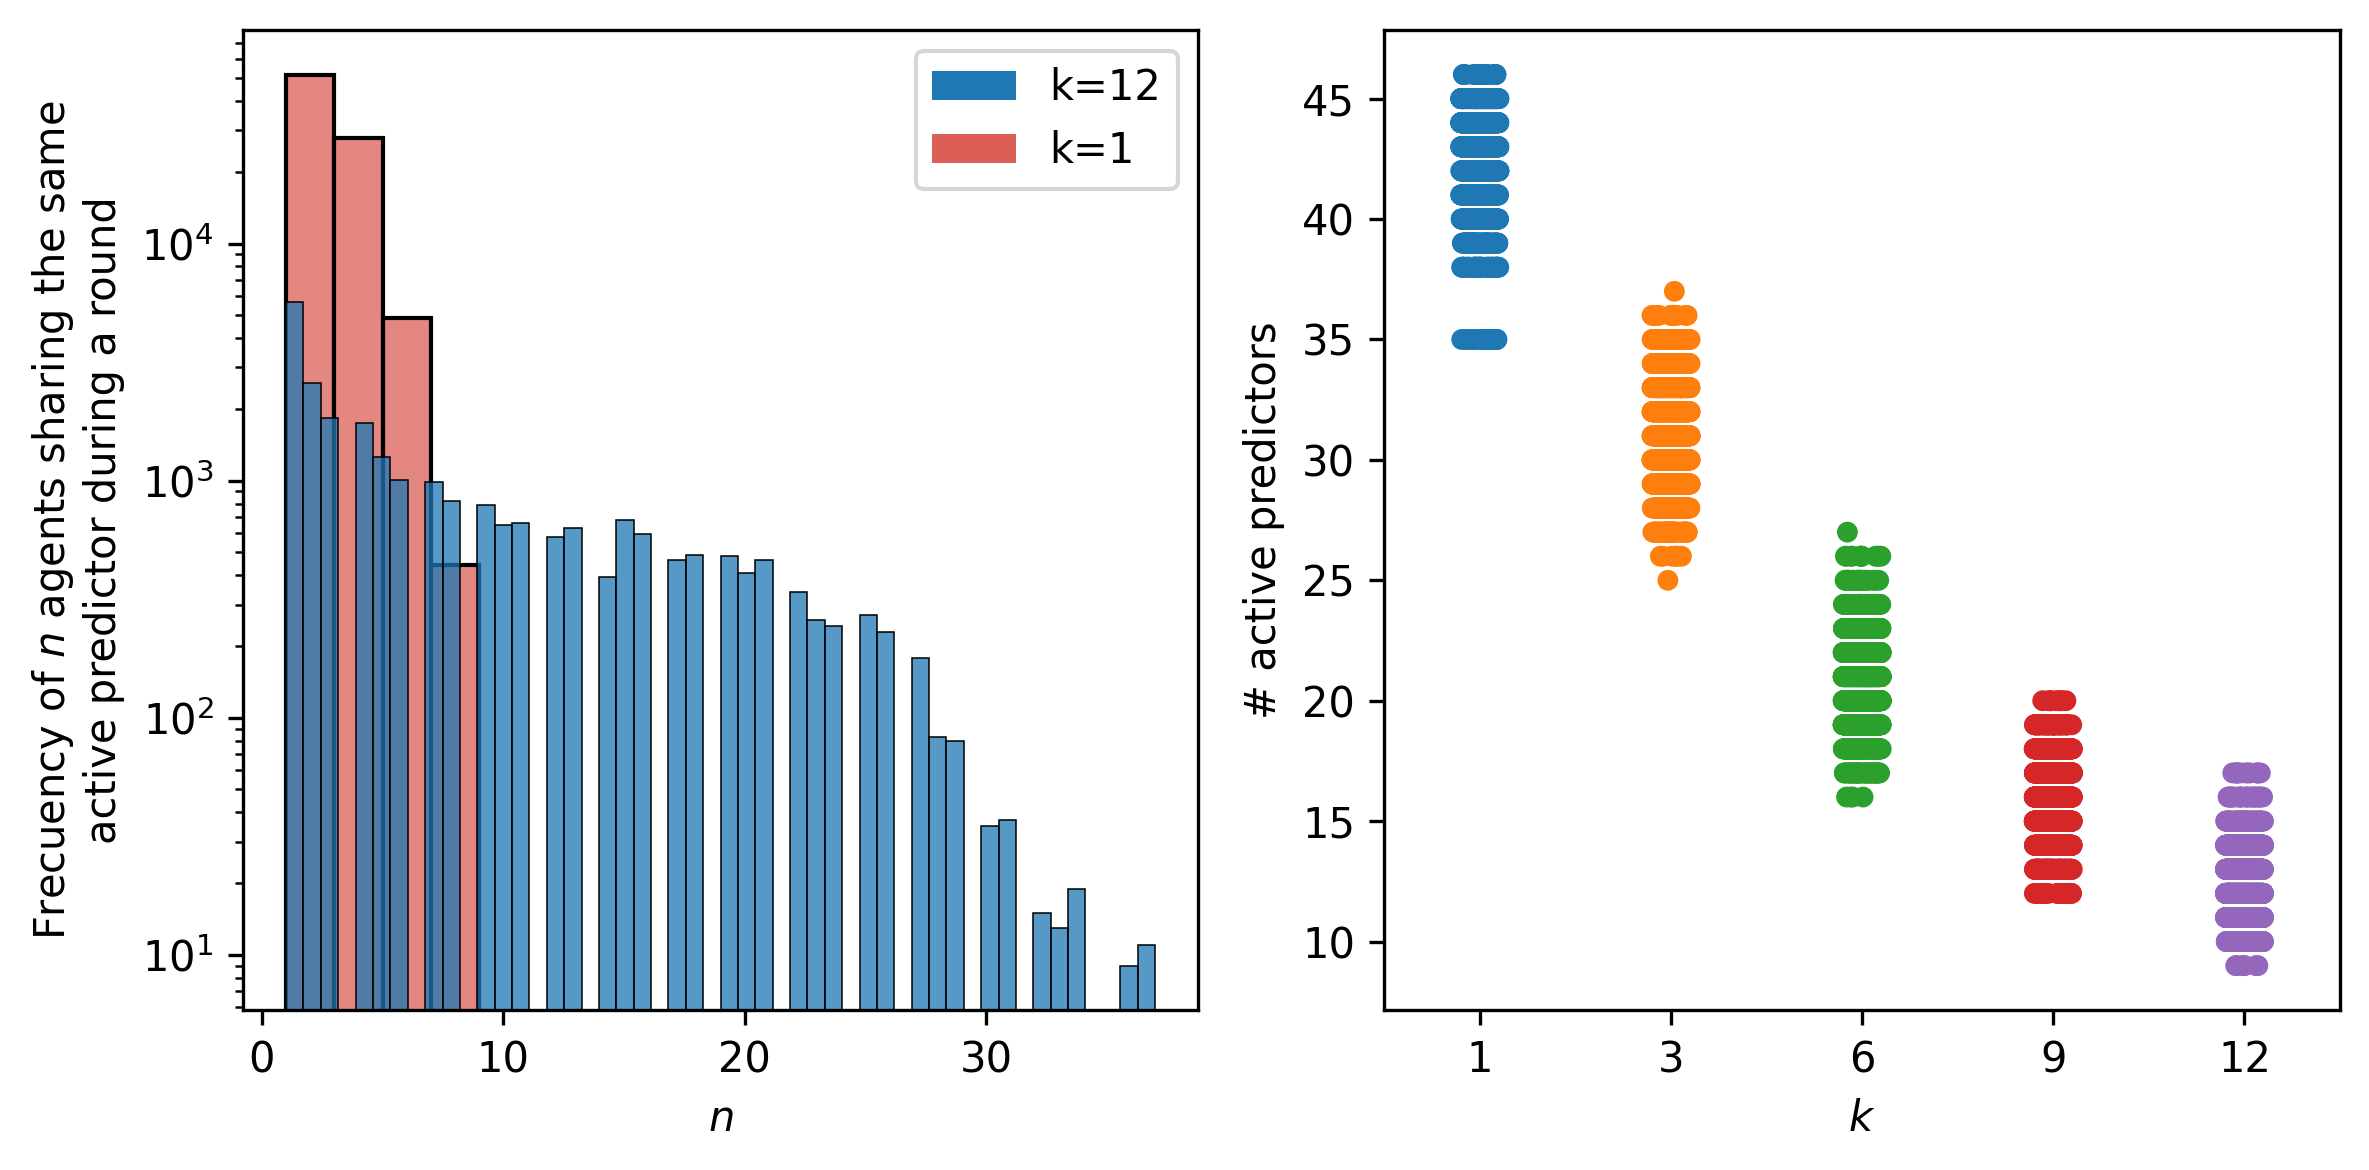

In [8]:
figura6(to_file=True)

---

# Figura 7

Precisión de los predictores activos con respecto al parámetro $w$. Se presenta la distribución de la precisión de los predictores activos de tipo ventana (panel de la izquierda) y cíclico (panel de la derecha) con respecto al valor del parámetro $w$. El ancho de las cajas codifica la cantidad de predictores del respectivo $w$. Los datos corresponden a las últimas 20 rondas de en un trial arbitrario.

In [87]:
def figura7(trial=10, to_file=False):

    def tipo_pred(x):
        s = x.split('-')
        ventana = s[0]
        tipo = s[1]
        if len(s) == 3:
            espejo = 'Yes'
        else:
            espejo = 'No'
        return ventana, tipo, espejo

    data = P.leer_datos([12],[12],[100],[100],
                    verb=False,muchos=False,cola=True)
    ids = data.Identificador.unique()[trial]
    data = pd.DataFrame(data[data.Identificador==ids])
    data['W'] = data.Politica.apply(lambda x: tipo_pred(x)[0])
    data['W'] = data['W'].astype(int)
    data['Tipo'] = data.Politica.apply(lambda x: tipo_pred(x)[1])
    data['Espejo'] = data.Politica.apply(lambda x: tipo_pred(x)[2])
    df = data[data.Espejo == 'No']
    df1 = df[df.Tipo == 'ventana']
    df2 = df[df.Tipo == 'ciclico']
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), tight_layout=True)
    bins, groups = zip(*df1.groupby('W')['Precision'])
    lengths = np.array([len(group) for group in groups])
    max_width = 0.8
    ax1.boxplot(groups, widths=max_width * lengths / lengths.max(),
                patch_artist=True, boxprops={'facecolor': 'lightblue'})
    ax1.set_xticklabels(bins)
    ax1.set_xlabel('W')
    ax1.set_ylabel('Precision')
    ax1.set_ylim([25,29])
#    ax1.set_xlim([0,11])
    ax1.set_title('Window')
#    ax1.grid()
    bins, groups = zip(*df2.groupby('W')['Precision'])
    lengths = np.array([len(group) for group in groups])
    max_width = 0.8
    ax2.boxplot(groups, widths=max_width * lengths / lengths.max(),
                patch_artist=True, boxprops={'facecolor': 'lightblue'})
    ax2.set_xticklabels(bins)
    ax2.set_xlabel('W')
    ax2.set_ylabel('Precision')
    ax2.set_ylim([25,29])
#    ax2.set_xlim([0,11])
    ax2.set_title('Cyclic')
    ax2.set_ylabel('')
#    ax2.grid()
    ax2.tick_params(labelleft=False)
    if to_file:
        plt.savefig('Figura7.png', dpi=300)
        print("Imagen guardada!")

Imagen guardada!


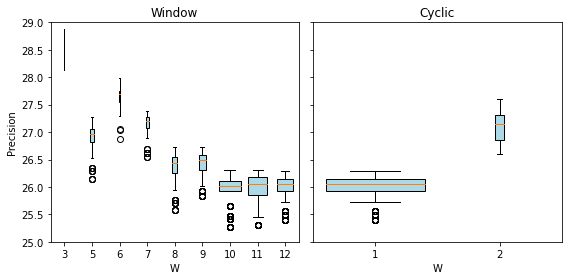

In [88]:
figura7(to_file=True)

---

---

---

---

---

---

In [34]:
def tipo_pred(x):
    s = x.split('-')
    ventana = s[0]
    tipo = s[1]
    if len(s) == 3:
        espejo = 'Yes'
    else:
        espejo = 'No'
    return ventana, tipo, espejo

In [6]:
data = P.leer_datos([12],[1,12],[100],[100],
                    verb=False,muchos=False,cola=True)
data['Modelo'] = data['Num_predic']
df = P.merge_modelos(data)

from scipy.stats import pearsonr

print("Deviation vs Inaccuracy")
cor_coef, p_val = pearsonr(df.Deviation, df.Inaccuracy)
print('Pearson correlation:', cor_coef)
print('p:', p_val)

print('*'*20)

print("Deviation vs Inaccuracy")
cor_coef, p_val = pearsonr(df.Deviation, df.Efficiency)
print('Pearson correlation:', cor_coef)
print('p:', p_val)

Deviation vs Inaccuracy
Pearson correlation: 0.9078182196591228
p: 1.1684881885686615e-76
********************
Deviation vs Inaccuracy
Pearson correlation: -0.6764411862057221
p: 4.16970813484889e-28


In [7]:
def figura3(to_file=False):

    m1 = 'k=1'
    m2 = 'k=12'
    data1 = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=False)
    data1['Modelo'] = m1
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False)
    data2['Modelo'] = m2
    ide = data1.Identificador.unique()[0]
    ronda = 55
    df1A = data1[(data1.Identificador == ide) & (data1.Ronda == ronda)]
    ide = data2.Identificador.unique()[0]
    ronda = 55
    df2A = data2[(data2.Identificador == ide) & (data2.Ronda == ronda)]
    df1B = data1.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: kurtosis(x)).reset_index(name='Kurtosis')
    df1B['Model'] = m1
    df2B = data2.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: kurtosis(x)).reset_index(name='Kurtosis')
    df2B['Model'] = m2
    dfK = pd.concat([df1B,df2B])

    fig, ax = plt.subplots(1,3, figsize=(9,3), tight_layout=True, dpi=300)
    sns.histplot(df1A.Prediccion,ax=ax[0],kde=True)
    sns.histplot(df2A.Prediccion,ax=ax[1],kde=True)
    ax[0].set_title(f'Dist. of predictions\nin a typical round\n in model {m1}')
    ax[1].set_title(f'Dist. of predictions\nin a typical round\n in model {m2}')
#    sns.histplot(x='Kurtosis',hue='Model',data=dfK,kde=True
#                 ,ax=ax[1,2],palette=paleta)
    sns.histplot(x='Kurtosis',hue='Model',data=dfK,kde=True
                 ,ax=ax[2])
    ax[2].set_xlim([-2,6])
    ax[2].set_title('Dist. of kurtosis per model')
#    ax[2].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
#          ncol=2, fancybox=False, shadow=False)
    if to_file:
        plt.savefig('Figura3.png')
        print("Imagen guardada!")


In [9]:
def figura4(to_file=False):

    fig, ax = plt.subplots(1,5, figsize=(15,3), tight_layout=True, dpi=300)
#    paleta = [sns.color_palette("Greys")[i] for i in [2,4]] 
#    markers1 = {'Activo':'o', 'Inactivo':'v'}

    # IZQUIERDA
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False)
    dfB1 = data2.groupby(['Identificador','Politica','Ronda']).agg({'Prediccion':'mean', 'Precision':'mean'}).reset_index()
    dfB1['Inaccuracy'] = dfB1['Precision']
    del dfB1['Precision']
    sns.scatterplot(x='Inaccuracy',y='Prediccion',alpha=.4,
                    marker='+',data=dfB1,ax=ax[0])
    ax[0].set_title('Prediction vs Inaccurracy\nAll rounds')
    ax[0].set_ylabel('Prediction')
    
    # CENTRO-IZQUIERDA
    data = pd.read_csv('ejemplo.csv')
    data['Active'] = data['Activo'].apply(lambda x: 'Yes' if x == 'Activo' else 'No')    
#    sns.scatterplot(x='Inaccuracy', y='Prediccion',ax=ax[2,1],
#               alpha=1,style='Activo',markers=markers1,data=data)
    sns.scatterplot(x='Inaccuracy', y='Prediccion',ax=ax[1],
               alpha=.9,marker='+',hue='Active',data=data)
    ax[1].set_xlim([20,45])
    ax[1].set_ylim([0,100])
    ax[1].set_ylabel('Prediction')
    ax[1].set_title('Prediction vs Inaccurracy\nExample round')
#    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.6),
#          ncol=3, fancybox=False, shadow=False)

'''
    # CENTRO-DERECHA
    data = P.leer_datos([12],[1,3,6,9,12],[100],[100],
                    verb=False,muchos=False,cola=True)
    df = data.groupby(['Num_predic','Identificador','Ronda'])['Politica'].nunique().reset_index(name='Num_pred_act')
    sns.stripplot(x='Num_predic',y='Num_pred_act',data=df,ax=ax[2])
#    ax[2].set_xticks([1,3,6,9,12])
    ax[2].set_title('Num. predictors \nvs\nNum. active predictors')
    ax[2].set_xlabel('Num. predictors')
    ax[2].set_ylabel('Num. active predictors')

    # DERECHA
    data1 = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=True)
    dfA = data1.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
#    dfA = dfA.groupby(['Identificador','Ronda'])['Conteo'].mean().reset_index()
    dfA['Model'] = 'k=1'
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=True)
    dfB = data2.groupby(['Identificador','Ronda'])['Politica'].value_counts().reset_index(name='Conteo')
#    dfB = dfB.groupby(['Identificador','Ronda'])['Conteo'].mean().reset_index()
    dfB['Model'] = 'k=12'
    df = pd.concat([dfA,dfB])
    sns.histplot(x='Conteo', hue='Model', data=df, ax=ax[3], bins=50)#, log_scale=True)
    ax[3].set_xlabel('Num. of agents using\nsame predictor per round')
#    ax[3].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
#          ncol=2, fancybox=False, shadow=False)

    # MAS A LA DERECHA
    m1 = 'k=1'
    m2 = 'k=12'
    data1 = P.leer_datos([12],[1],[100],[100],
                    verb=False,muchos=False,cola=False)
    data1['Modelo'] = m1
    df1B = data1.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: skew(x)).reset_index(name='Skewness')
    df1B['Model'] = m1
    data2 = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=False)
    data2['Modelo'] = m2
    df2B = data2.groupby(['Identificador','Ronda'])['Prediccion'].apply(lambda x: skew(x)).reset_index(name='Skewness')
    df2B['Model'] = m2
    dfK = pd.concat([df1B,df2B])
    sns.histplot(x='Skewness', hue='Model', data=dfK, ax=ax[4], bins=50)
    if to_file:
        plt.savefig('Figura4.png')
        print("Imagen guardada!")

'''

'\n    # CENTRO-DERECHA\n    data = P.leer_datos([12],[1,3,6,9,12],[100],[100],\n                    verb=False,muchos=False,cola=True)\n    df = data.groupby([\'Num_predic\',\'Identificador\',\'Ronda\'])[\'Politica\'].nunique().reset_index(name=\'Num_pred_act\')\n    sns.stripplot(x=\'Num_predic\',y=\'Num_pred_act\',data=df,ax=ax[2])\n#    ax[2].set_xticks([1,3,6,9,12])\n    ax[2].set_title(\'Num. predictors \nvs\nNum. active predictors\')\n    ax[2].set_xlabel(\'Num. predictors\')\n    ax[2].set_ylabel(\'Num. active predictors\')\n\n    # DERECHA\n    data1 = P.leer_datos([12],[1],[100],[100],\n                    verb=False,muchos=False,cola=True)\n    dfA = data1.groupby([\'Identificador\',\'Ronda\'])[\'Politica\'].value_counts().reset_index(name=\'Conteo\')\n#    dfA = dfA.groupby([\'Identificador\',\'Ronda\'])[\'Conteo\'].mean().reset_index()\n    dfA[\'Model\'] = \'k=1\'\n    data2 = P.leer_datos([12],[12],[100],[100],\n                        verb=False,muchos=False,cola=True)\

In [31]:
data = P.leer_datos([12],[12],[100],[100],
                        verb=False,muchos=False,cola=True)
data.head()

,Memoria,Num_predic,Num_agentes,Num_rondas,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision
80,12,12,100,100,2400,80,0,0,0,1-ciclico,61,26.300000
81,12,12,100,100,2400,81,0,0,0,1-ciclico,60,26.074074
82,12,12,100,100,2400,82,0,1,1,1-ciclico,60,25.756098
83,12,12,100,100,2400,83,0,1,1,1-ciclico,62,25.481928
84,12,12,100,100,2400,84,0,0,0,1-ciclico,57,25.428571


In [32]:
def dist_preds(data, idx=0):
    ident = data.Identificador.unique()[0]
    ronda = data.Ronda.unique()[idx]
    dfA = pd.DataFrame(data[data.Identificador == ident])
    dfA = pd.DataFrame(dfA[dfA.Ronda == ronda])
    dfA['W'] = dfA.Politica.apply(lambda x: tipo_pred(x)[0])
    dfA['W'] = dfA['W'].astype(int)
    dfA['Tipo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[1])
    dfA['Espejo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[2])
    df1 = pd.DataFrame(dfA[dfA.Espejo == 'No'])
    df2 = pd.DataFrame(dfA[dfA.Espejo == 'Yes'])

    fig, ax = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
    sns.scatterplot(x='W', y='Precision', hue='Tipo', data=df1, ax=ax[0])
    sns.scatterplot(x='W', y='Precision', hue='Tipo', data=df2, ax=ax[1])

    ax[0].set_title('Fundamentales')
    ax[1].set_title('Espejos')
    

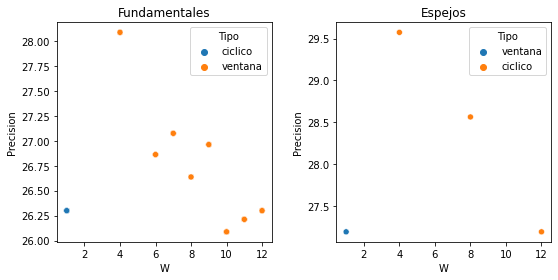

In [35]:
dist_preds(data, 0)

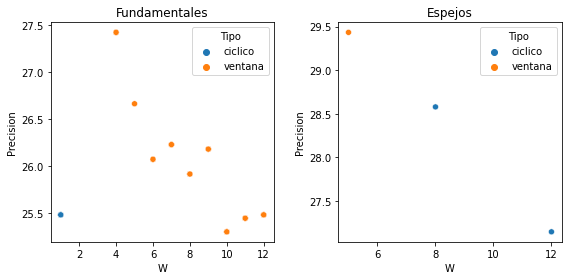

In [39]:
dist_preds(data, 3)

In [40]:
def dist_preds1(data, idx=0):
    ident = data.Identificador.unique()[idx]
    dfA = pd.DataFrame(data[data.Identificador == ident])
    dfA['W'] = dfA.Politica.apply(lambda x: tipo_pred(x)[0])
    dfA['W'] = dfA['W'].astype(int)
    dfA['Tipo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[1])
    dfA['Espejo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[2])
    df1 = pd.DataFrame(dfA[dfA.Espejo == 'No'])
    df2 = pd.DataFrame(dfA[dfA.Espejo == 'Yes'])

    fig, ax = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
    sns.boxplot(x='W', y='Precision', hue='Tipo', data=df1, ax=ax[0])
    sns.boxplot(x='W', y='Precision', hue='Tipo', data=df2, ax=ax[1])

    ax[0].set_title('Fundamentales')
    ax[1].set_title('Espejos')

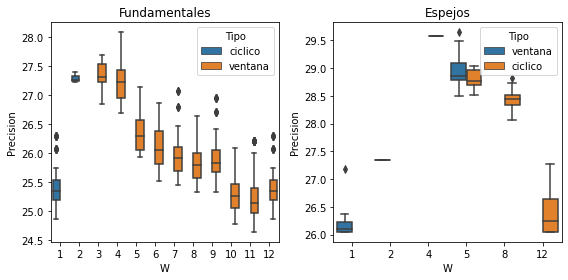

In [42]:
dist_preds1(data, idx=0)

In [43]:
def dist_preds2(data):
    dfA = data
    dfA['W'] = dfA.Politica.apply(lambda x: tipo_pred(x)[0])
    dfA['W'] = dfA['W'].astype(int)
    dfA['Tipo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[1])
    dfA['Espejo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[2])
    df1 = pd.DataFrame(dfA[dfA.Espejo == 'No'])
    df2 = pd.DataFrame(dfA[dfA.Espejo == 'Yes'])

    fig, ax = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
    sns.boxplot(x='W', y='Precision', hue='Tipo', hue_order=['ventana', 'ciclico'], data=df1, ax=ax[0])
    sns.boxplot(x='W', y='Precision', hue='Tipo', hue_order=['ventana', 'ciclico'], data=df2, ax=ax[1])

    ax[0].set_title('Fundamentales')
    ax[0].set_ylim([23,34])
    ax[1].set_title('Espejos')
    ax[1].set_ylim([23,34])


In [44]:
data.head()

,Memoria,Num_predic,Num_agentes,Num_rondas,Identificador,Ronda,Agente,Estado,Puntaje,Politica,Prediccion,Precision
80,12,12,100,100,2400,80,0,0,0,1-ciclico,61,26.300000
81,12,12,100,100,2400,81,0,0,0,1-ciclico,60,26.074074
82,12,12,100,100,2400,82,0,1,1,1-ciclico,60,25.756098
83,12,12,100,100,2400,83,0,1,1,1-ciclico,62,25.481928
84,12,12,100,100,2400,84,0,0,0,1-ciclico,57,25.428571


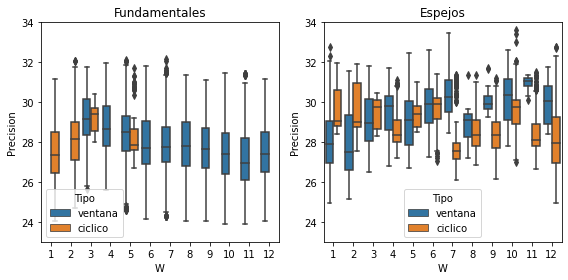

In [45]:
dist_preds2(data)

In [21]:
sns.countplot(data.Espejo)

AttributeError: 'DataFrame' object has no attribute 'Espejo'

NameError: name 'tipo_pred' is not defined

c:\users\edgar.andrade\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


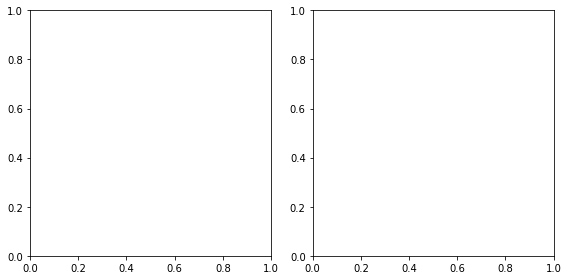

In [22]:
fig, ax = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
dfA['W'] = data.Politica.apply(lambda x: tipo_pred(x)[0])
dfA['W'] = dfA['W'].astype(int)
dfA['Tipo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[1])
dfA['Espejo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[2])
df1 = pd.DataFrame(dfA[dfA.Espejo == 'No'])
sns.boxplot(x='W', y='Precision', hue='Tipo', hue_order=['ventana', 'ciclico'], data=df1, ax=ax[0])

In [ ]:
#data = pd.read_csv('ejemplo.csv')
data = P.leer_datos([12],[12],[100],[100],
                    verb=False,muchos=False,cola=True)
ident = data.Identificador.unique()[0]
ronda = data.Ronda.unique()[0]
dfA = pd.DataFrame(data[data.Identificador == ident])
dfA = pd.DataFrame(dfA[dfA.Ronda == ronda])
dfA.head()

In [23]:
def tipo_pred(x):
    vals = x.split('-')
    try:
        espejo = vals[2]
        espejo = 'Yes'
    except:
        espejo = 'No'
    return vals[0], vals[1], espejo

In [24]:
dfA['W'] = dfA.Politica.apply(lambda x: tipo_pred(x)[0])
dfA['W'] = dfA['W'].astype(int)
dfA['Tipo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[1])
dfA['Espejo'] = dfA.Politica.apply(lambda x: tipo_pred(x)[2])
dfA.head()

,Identificador,Ronda,Politica,Conteo,Model,W,Tipo,Espejo
0,2000,80,1-ventana,5,k=1,1,ventana,No
1,2000,80,10-ciclico-espejo,5,k=1,10,ciclico,Yes
2,2000,80,11-ciclico-espejo,5,k=1,11,ciclico,Yes
3,2000,80,11-ventana,4,k=1,11,ventana,No
4,2000,80,11-ventana-espejo,4,k=1,11,ventana,Yes


In [25]:
dfA.Politica.unique()

array(['1-ventana', '10-ciclico-espejo', '11-ciclico-espejo',
       '11-ventana', '11-ventana-espejo', '12-ciclico-espejo',
       '12-ventana-espejo', '5-ciclico-espejo', '6-ciclico-espejo',
       '1-ventana-espejo', '10-ciclico', '2-ciclico-espejo',
       '3-ciclico-espejo', '4-ventana', '5-ventana', '7-ciclico-espejo',
       '8-ciclico', '8-ciclico-espejo', '8-ventana', '1-ciclico',
       '10-ventana', '10-ventana-espejo', '2-ciclico', '3-ventana-espejo',
       '4-ciclico', '6-ciclico', '8-ventana-espejo', '11-ciclico',
       '12-ventana', '2-ventana', '2-ventana-espejo', '3-ventana',
       '4-ciclico-espejo', '4-ventana-espejo', '5-ciclico', '6-ventana',
       '6-ventana-espejo', '7-ciclico', '7-ventana', '7-ventana-espejo',
       '9-ventana', '9-ventana-espejo', '3-ciclico', '12-ciclico',
       '9-ciclico', '1-ciclico-espejo', '5-ventana-espejo',
       '9-ciclico-espejo'], dtype=object)

ValueError: Could not interpret value `Precision` for parameter `y`

c:\users\edgar.andrade\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:2359: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


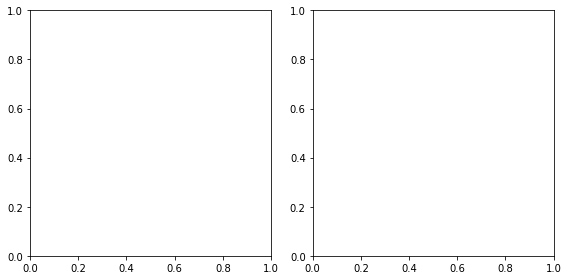

In [26]:
df1 = pd.DataFrame(dfA[dfA.Espejo == 'No'])
df2 = pd.DataFrame(dfA[dfA.Espejo == 'Yes'])

fig, ax = plt.subplots(1,2, figsize=(8,4), tight_layout=True)
sns.scatterplot(x='W', y='Precision', hue='Tipo', data=df1, ax=ax[0])
sns.scatterplot(x='W', y='Precision', hue='Tipo', data=df2, ax=ax[1])

ax[0].set_title('Fundamentales')
ax[1].set_title('Espejos')

In [ ]:
sns.boxplot(x=data.Tipo, y=data.Inaccuracy)

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x=data.Predictor, y=data.Inaccuracy, ax=ax)
plt.xticks(rotation = 90)

In [ ]:
data['Active'] = data['Activo'].apply(lambda x: 'Yes' if x == 'Activo' else 'No')    
#    sns.scatterplot(x='Inaccuracy', y='Prediccion',ax=ax[2,1],
#               alpha=1,style='Activo',markers=markers1,data=data)
    sns.scatterplot(x='Inaccuracy', y='Prediccion',ax=ax[1],
               alpha=.9,marker='+',hue='Active',data=data)
    ax[1].set_xlim([20,45])
    ax[1].set_ylim([0,100])
    ax[1].set_ylabel('Prediction')
    ax[1].set_title('Prediction vs Inaccurracy\nExample round')